<a href="https://colab.research.google.com/github/crimcrist/Machine-Learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LINEAR REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, HuberRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import skew, norm
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/data/house_prices.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Overview**

In [ ]:
TARGET_COL = 'SalePrice'

print("Data Shape:", df.shape)

print("\nBaris pertama data:")
display(df.head())

print("\nInformasi dataset:")
print(df.info())

print("\nStatistik ringkas:")
display(df.describe(include="all"))

# Identifikasi Tipe Data Awal
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if TARGET_COL in numerical_cols:
    numerical_cols.remove(TARGET_COL)
categorical_cols = df.select_dtypes(include='object').columns.tolist()


Data Shape: (1460, 81)

Baris pertama data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


# **Impute Missing Value**

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Jumlah Missing Values per Kolom:")
display(missing)

Jumlah Missing Values per Kolom:


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


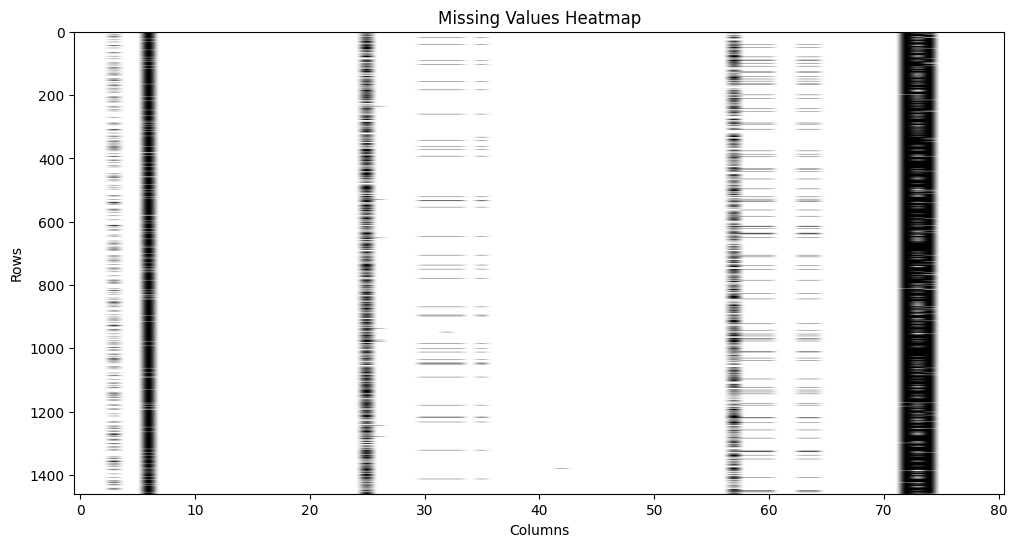

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(df.isnull(), aspect='auto', cmap='gray_r')
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


In [ ]:
print("\n--- Imputasi Missing Values & Data Cleaning ---")

# 1. Imputasi untuk Kategori (mengisi NA dengan 'None' yang berarti 'Tidak Ada')
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'MasVnrType']:
    df[col].fillna('None', inplace=True)

# 2. Imputasi LotFrontage (numerik) berdasarkan median Neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# 3. Imputasi Kolom Numerik Sisanya dengan Median
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# 4. Imputasi Kolom Kategorikal Sisanya dengan Modus (Mode)
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

print(f"Nilai hilang telah ditangani. Cek final: {df.isnull().sum().max()}")

# 5. Menghapus Outlier Ekstrim (GrLivArea vs SalePrice)
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index)
print(f"Outlier ekstrim dihapus. Dimensi Baru: {df.shape}")


--- Imputasi Missing Values & Data Cleaning ---
Nilai hilang telah ditangani. Cek final: 0
Outlier ekstrim dihapus. Dimensi Baru: (1458, 81)


/tmp/ipython-input-2307851151.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('None', inplace=True)
/tmp/ipython-input-2307851151.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

## **Eksplorasi Data Analysis**

# **Univariate Analysis**


--- Univariate Analysis ---


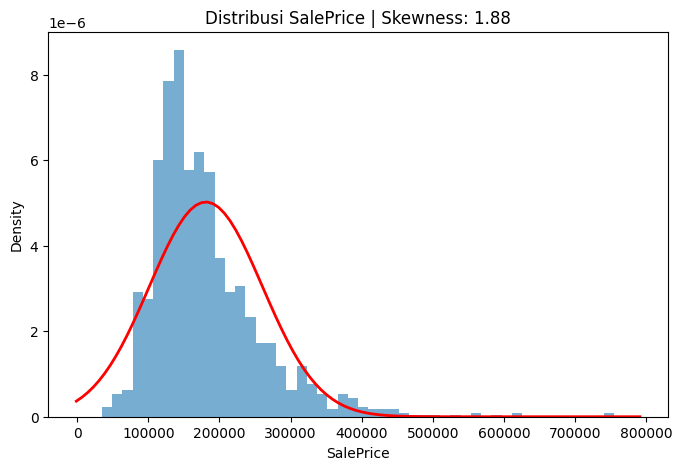

Top 5 Fitur Numerik dengan Skewness Tertinggi:
MiscVal         24.434913
PoolArea        15.932532
LotArea         12.560986
3SsnPorch       10.286510
LowQualFinSF     8.995688
dtype: float64


In [ ]:
print("\n--- Univariate Analysis ---")
# Distribusi Variabel Target
(mu, sigma) = norm.fit(df[TARGET_COL])
plt.figure(figsize=(8, 5))
# Menggunakan plt.hist untuk histogram
plt.hist(df[TARGET_COL], bins=50, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f'Distribusi {TARGET_COL} | Skewness: {df[TARGET_COL].skew():.2f}')
plt.xlabel(TARGET_COL)
plt.ylabel('Density')
plt.show()

# Analisis Skewness (Kemiringan)
skewed_feats_init = df[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Top 5 Fitur Numerik dengan Skewness Tertinggi:")
print(skewed_feats_init.head())

# **Bivariate Analysis**


--- Bivariate Analysis ---


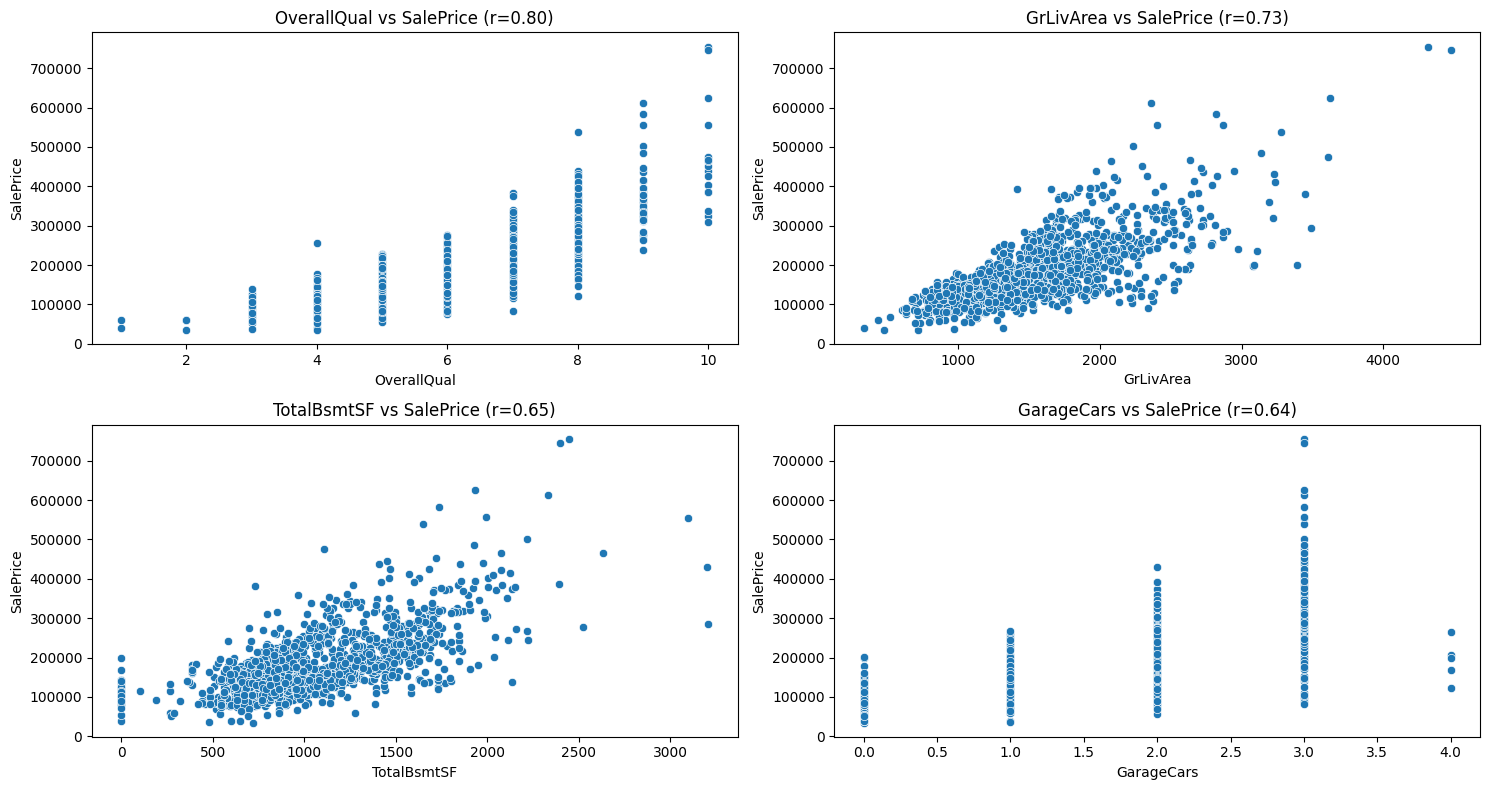

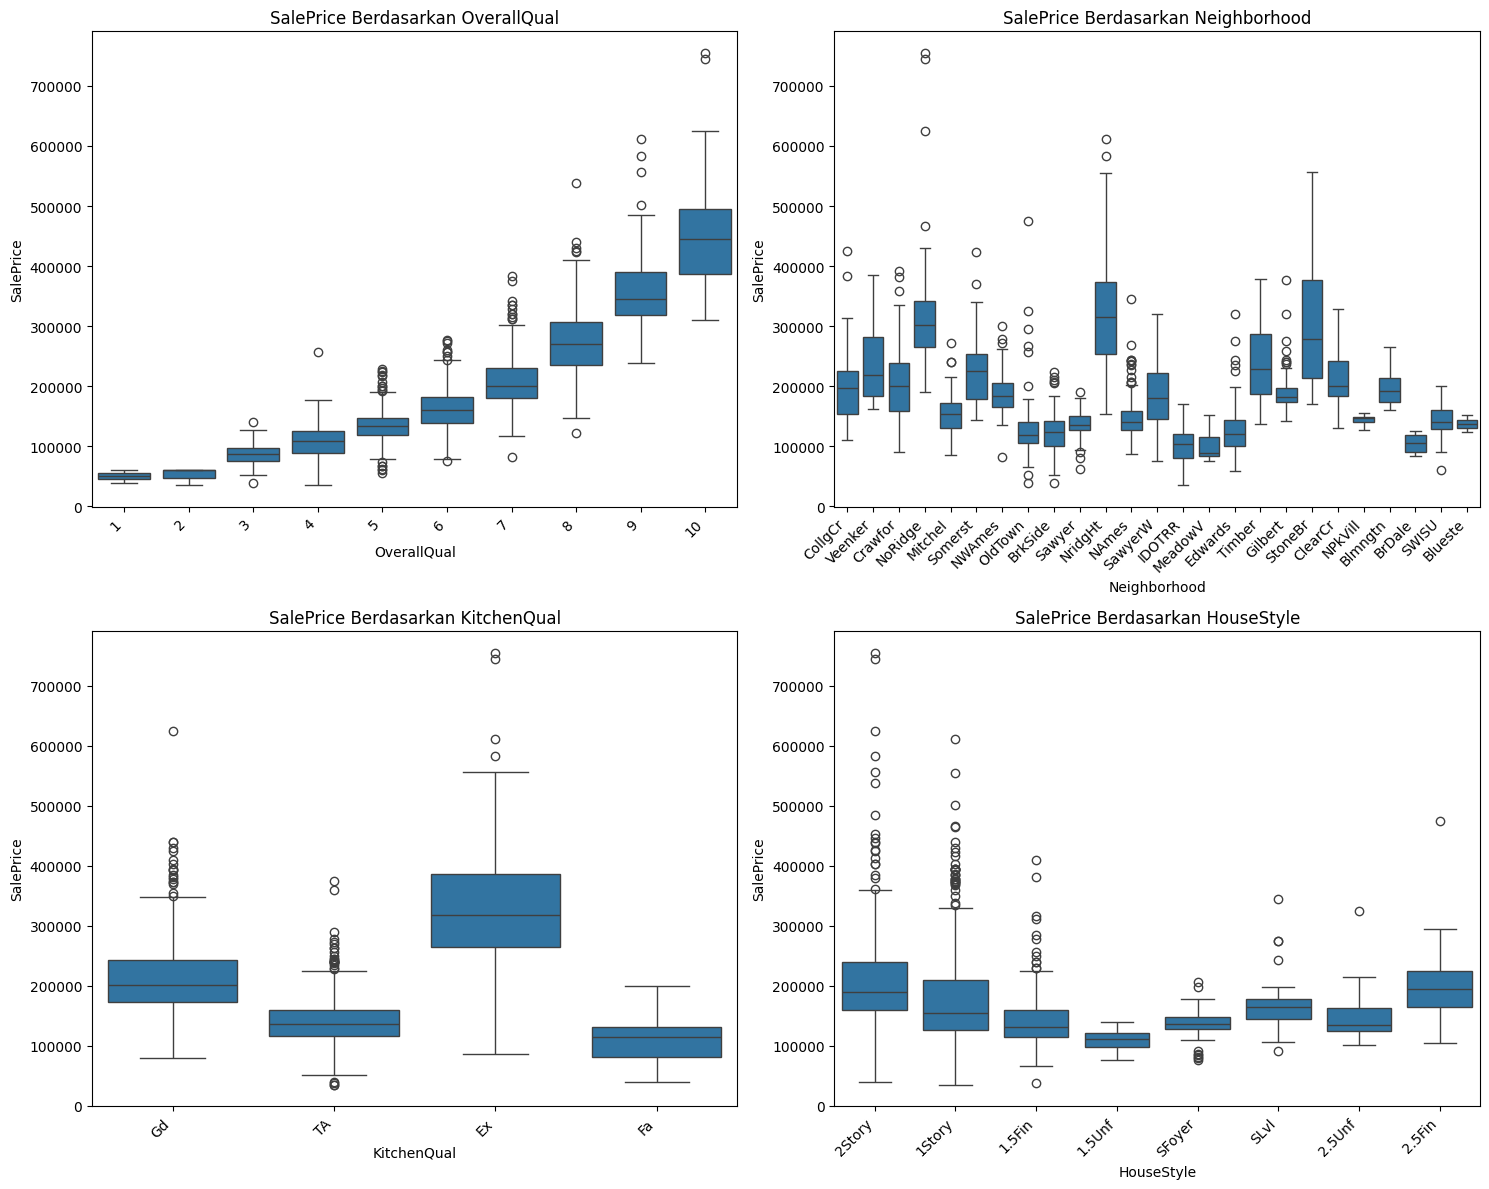

In [ ]:
print("\n--- Bivariate Analysis ---")
# Scatter Plot 4 Fitur Numerik dengan Korelasi Tertinggi
corr_target = df[numerical_cols + [TARGET_COL]].corr()[TARGET_COL].sort_values(ascending=False)
top_4_features = corr_target[1:5].index.tolist()

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_4_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[col], y=df[TARGET_COL])
    plt.title(f'{col} vs SalePrice (r={corr_target[col]:.2f})')
plt.tight_layout()
plt.show()

# Box Plot 4 Fitur Kategorikal Penting vs Target
key_cat_cols = ['OverallQual', 'Neighborhood', 'KitchenQual', 'HouseStyle']
plt.figure(figsize=(15, 12))
for i, col in enumerate(key_cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col], y=df[TARGET_COL])
    plt.title(f'SalePrice Berdasarkan {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Multivariate Analysis**


--- Multivariate Analysis (Korelasi) ---


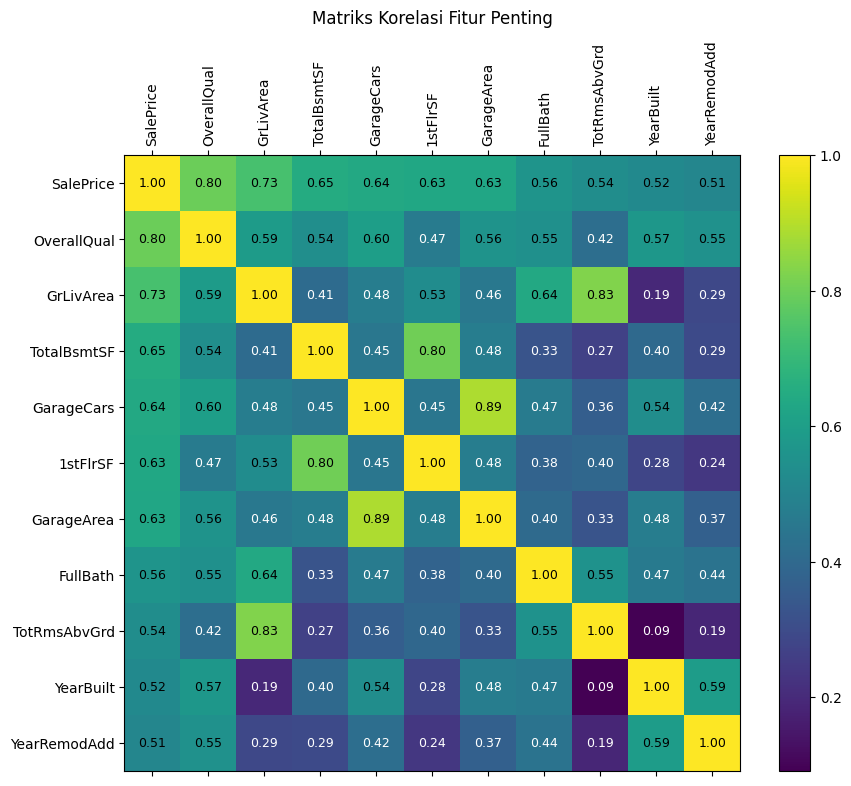

In [ ]:
print("\n--- Multivariate Analysis (Korelasi) ---")
# Heatmap untuk Fitur-fitur yang Sangat Terkorelasi
high_corr_cols = corr_target[corr_target > 0.5].index.tolist()

plt.figure(figsize=(10, 8))
# Menggunakan plt.matshow dan plt.colorbar untuk membuat heatmap
corr_matrix = df[high_corr_cols].corr()
plt.matshow(corr_matrix, cmap='viridis', fignum=0)
plt.xticks(range(len(high_corr_cols)), high_corr_cols, rotation=90)
plt.yticks(range(len(high_corr_cols)), high_corr_cols)
plt.colorbar()

# Menambahkan nilai korelasi (optional, for detail)
for (i, j), val in np.ndenumerate(corr_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='w' if abs(val) < 0.5 else 'black', fontsize=9)

plt.title('Matriks Korelasi Fitur Penting', y=1.2)
plt.show()

# **Data Mapping & Feature Preparation**

In [ ]:
print("\n--- Data Mapping & Feature Preparation ---")

# 1. Transformasi Logaritmik untuk Target dan Fitur Miring
# untuk menerapkan np.log1p() pada SalePrice dan fitur numerik yang skewed.
# tujuannya adalah membuat distribusi mendekati normal (Gaussian) yang merupakan asumsi penting bagi banyak model regresi.
df['SalePrice_Log'] = np.log1p(df[TARGET_COL])
y = df['SalePrice_Log']

skewed_features = skewed_feats_init[abs(skewed_feats_init) > 0.75].index
for feat in skewed_features:
    if feat in df.columns and feat not in ['Id']:
        df[feat] = np.log1p(df[feat])

# 2. Split Feature (X) & Target (y)
# Memisahkan data menjadi X (Fitur/Input) dan y (Target/Output).
X = df.drop(columns=[TARGET_COL, 'SalePrice_Log', 'Id'], errors='ignore')
categorical_cols_final = X.select_dtypes(include='object').columns.tolist()

# 3. One-Hot Encoding (OHE)
# Mengubah semua variabel kategorikal menjadi fitur biner (0 atau 1).
# Misalnya, kolom MSZoning dengan nilai RL akan menjadi kolom baru MSZoning_RL dengan nilai 1.
X = pd.get_dummies(X, columns=categorical_cols_final, drop_first=True)
print(f"Jumlah Fitur (kolom X) setelah OHE: {X.shape[1]}")

# 4. Standardisasi (Scaling)
# Mengubah semua fitur numerik agar memiliki rata-rata = 0 dan standar deviasi = 1.
# Ini mencegah fitur dengan rentang nilai besar (e.g., LotArea) mendominasi perhitungan model, terutama untuk model berbasis jarak seperti Regresi.
final_numerical_cols = [col for col in X.columns if X[col].nunique() > 2]
scaler = StandardScaler()
X[final_numerical_cols] = scaler.fit_transform(X[final_numerical_cols])

# 5. Train-Test Split
# Membagi data menjadi Training Set (80%) untuk melatih model,
# dan Testing Set (20%) untuk menguji kinerja model yang belum pernah dilihat sebelumnya.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data Training: {X_train.shape[0]}, Data Testing: {X_test.shape[0]}")


--- Data Mapping & Feature Preparation ---
Jumlah Fitur (kolom X) setelah OHE: 258
Data Training: 1166, Data Testing: 292


# **Pemilihan Fitur Berbasis Feature Importance**


--- Pemilihan Fitur Berbasis Feature Importance ---

15 Fitur yang Terpilih (Importance > 0.005):
['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'GarageCars', 'BsmtFinSF1', '1stFlrSF', 'CentralAir_Y', 'YearBuilt', 'LotArea', 'OverallCond', 'YearRemodAdd', 'OpenPorchSF', 'BsmtUnfSF', 'TotRmsAbvGrd']
Dimensi Data Training Baru: (1166, 15)
Dimensi Data Testing Baru: (292, 15)


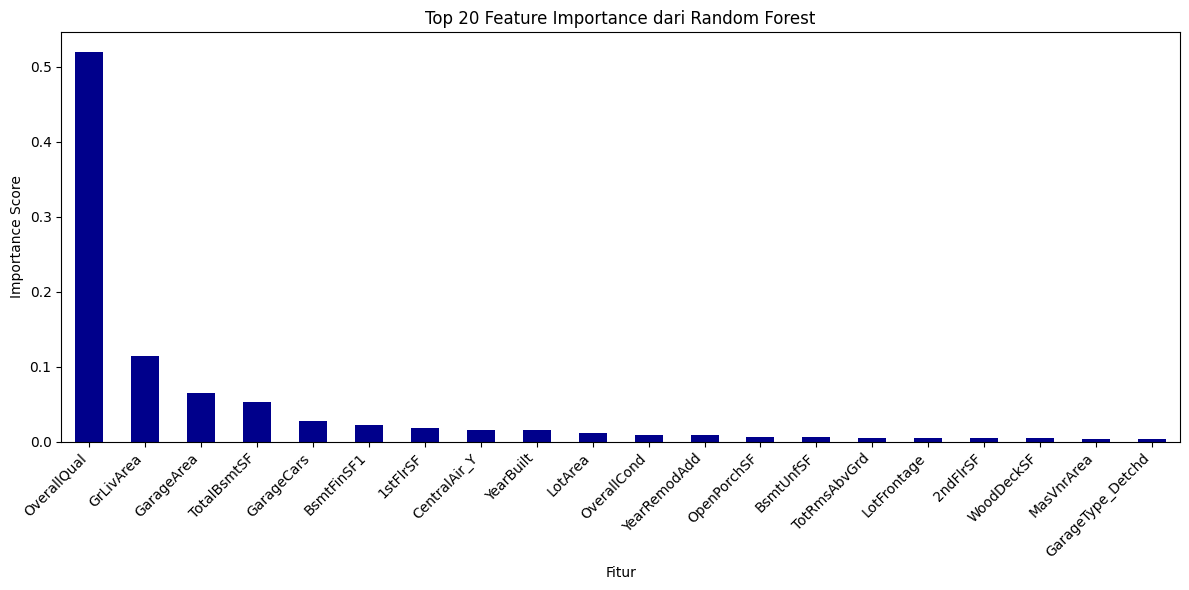

In [ ]:
print("\n--- Pemilihan Fitur Berbasis Feature Importance ---")

# 1. Menggunakan Model Random Forest untuk Mendapatkan Feature Importance
# menggunakan model RF pada data pelatihan (X_train dan y_train) untuk mengekstrak metrik Feature Importance.
rfr_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_selector.fit(X_train, y_train)

# 2. Ekstraksi Feature Importance
feature_importances = pd.Series(rfr_selector.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)

# 3. Tentukan Ambang Batas (Threshold)
# untuk nentuin ambang batas (e.g., importance > 0.005). Hanya fitur yang importance score-nya melebihi ambang batas yang dipertahankan.
# untuk menghilangkan "kebisingan" (fitur yang tidak relevan atau noise).
THRESHOLD = 0.005
selected_features = feature_importances[feature_importances > THRESHOLD].index.tolist()

print(f"\n{len(selected_features)} Fitur yang Terpilih (Importance > {THRESHOLD}):")
print(selected_features)

# 4. Filter data X_train dan X_test hanya untuk fitur yang terpilih
# membuat subset data baru (X_train_selected dan X_test_selected) yang hanya berisi fitur-fitur terpilih.
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"Dimensi Data Training Baru: {X_train_selected.shape}")
print(f"Dimensi Data Testing Baru: {X_test_selected.shape}")

# Visualisasi Top 20 Feature Importance
plt.figure(figsize=(12, 6))
feature_importances.head(20).plot(kind='bar', color='darkblue')
plt.title('Top 20 Feature Importance dari Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Fitur')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Perbandingan Multi-Model Regresi**


--- Perbandingan Multi-Model Regresi (8 Model Total) ---

### HASIL AKHIR PERBANDINGAN MODEL (8 Model Total) ###
                              R2 Score  MAE (USD)  RMSE (USD)
7. Lasso Regression               0.90   16462.68    22858.61
1. Linear Regression              0.90   16466.35    22912.84
2. Ridge Regression               0.90   16491.49    22947.15
3. Polynomial Regression          0.90   15393.44    21491.43
4. Robust Regression (Huber)      0.90   16567.85    23559.14
8. Random Forest                  0.86   17591.89    26139.11
6. Support Vector Regr (SVR)      0.76   21892.60    32874.27
5. Stochastic Regr. (SGD)         0.64   26091.39    36615.62


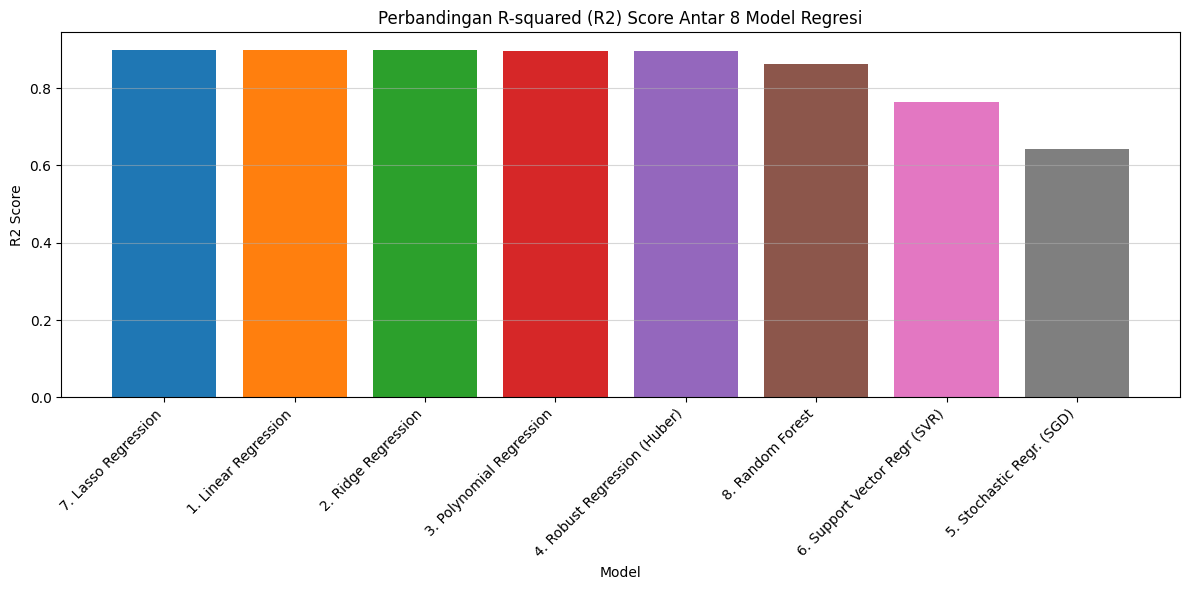

In [ ]:
print("\n--- Perbandingan Multi-Model Regresi (8 Model Total) ---")

def evaluate_model_selected(model, model_name):
    model.fit(X_train_selected, y_train)
    y_pred_log = model.predict(X_test_selected)

    y_test_original = np.expm1(y_test)
    y_pred_original = np.expm1(y_pred_log)

    mae = mean_absolute_error(y_test_original, y_pred_original)
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    r2 = r2_score(y_test, y_pred_log)

    return {'R2 Score': r2, 'MAE (USD)': mae, 'RMSE (USD)': rmse}

models = {
    "1. Linear Regression": LinearRegression(),
    "2. Ridge Regression": Ridge(alpha=10, random_state=42),
    "3. Polynomial Regression": Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('linear', LinearRegression())
    ]),
    "4. Robust Regression (Huber)": HuberRegressor(epsilon=1.35, max_iter=1000),
    "5. Stochastic Regr. (SGD)": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "6. Support Vector Regr (SVR)": SVR(kernel='rbf', C=100, gamma=0.1), # Menggunakan RBF kernel
    "7. Lasso Regression": Lasso(alpha=0.0005, random_state=42, max_iter=2000), # Regularisasi L1
    "8. Random Forest": RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42) # Ensemble
}

results_selected = {}
for name, model in models.items():
    metrics = evaluate_model_selected(model, name)
    results_selected[name] = metrics

# Hasil Perbandingan Model
results_df_selected = pd.DataFrame(results_selected).T.sort_values(by='R2 Score', ascending=False)

print("\n=============================================")
print("### HASIL AKHIR PERBANDINGAN MODEL (8 Model Total) ###")
print("=============================================")
print(results_df_selected.round(2))

# Visualisasi Hasil (plt.bar)
plt.figure(figsize=(12, 6))
plt.bar(results_df_selected.index, results_df_selected['R2 Score'],
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.title('Perbandingan R-squared (R2) Score Antar 8 Model Regresi')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

--- Visualisasi Kinerja Prediksi Individual ---


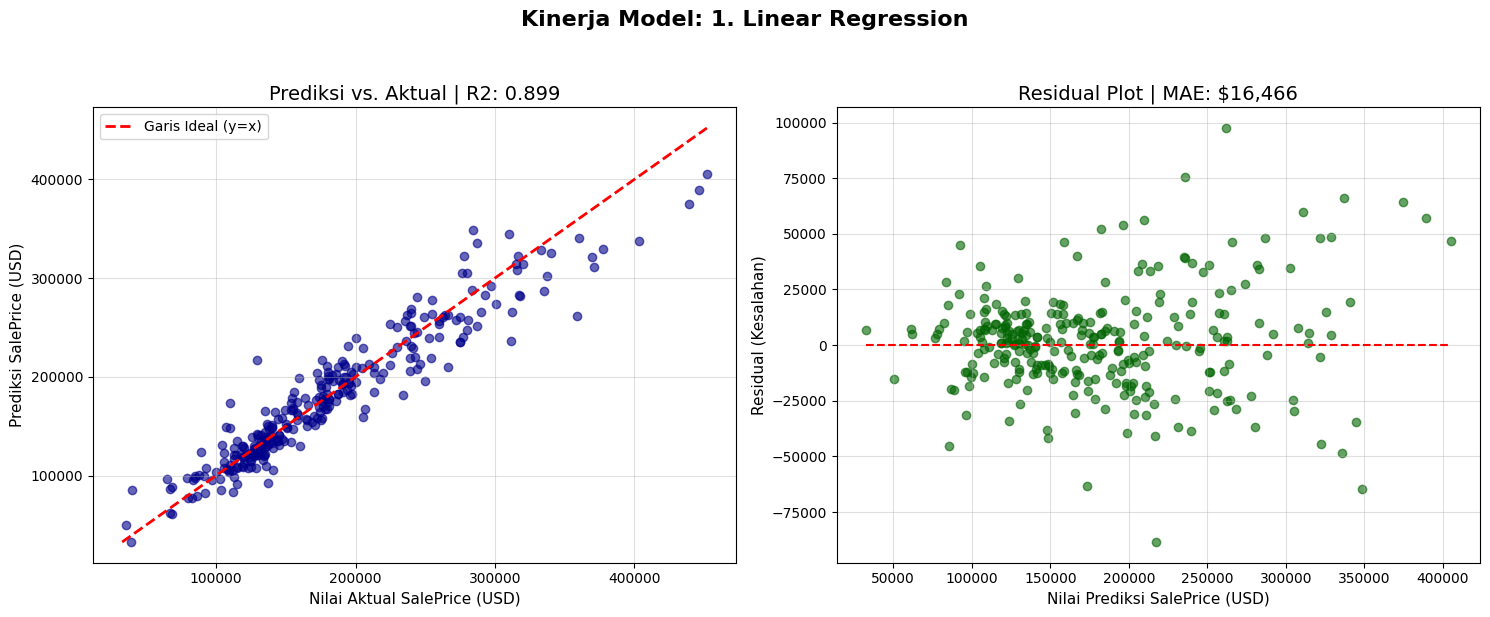

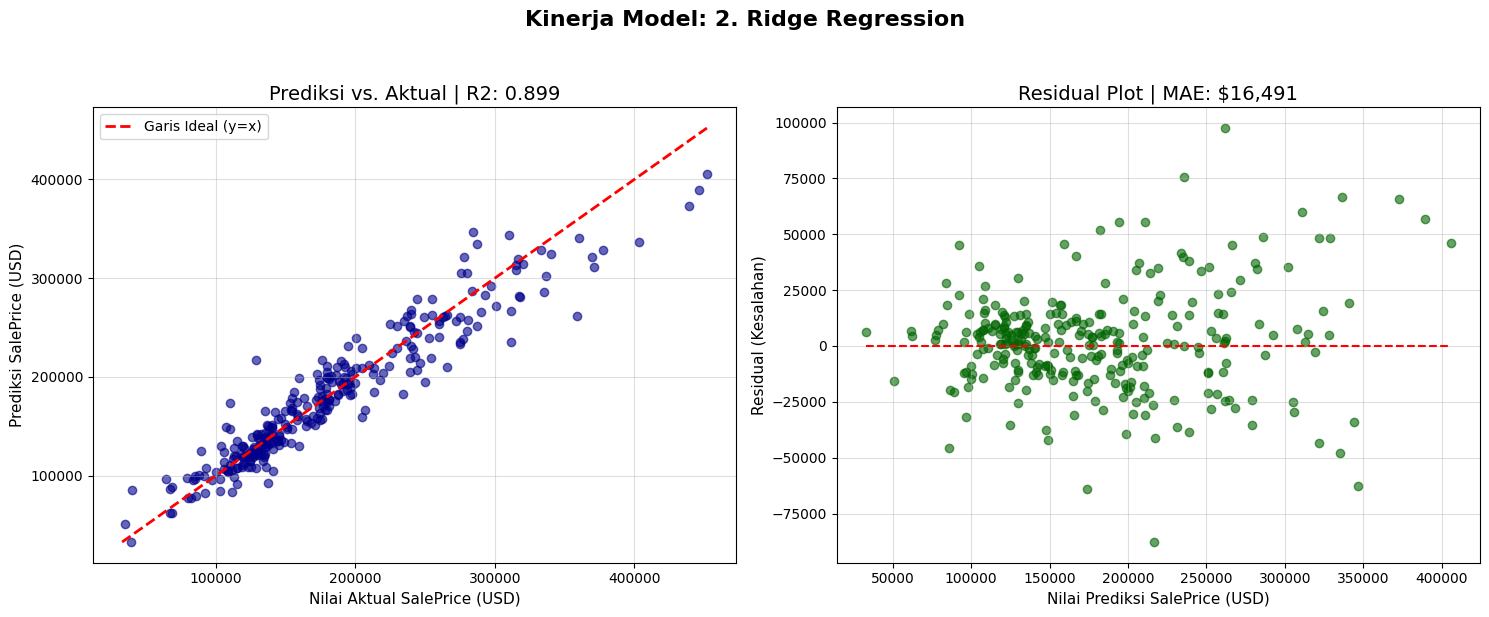

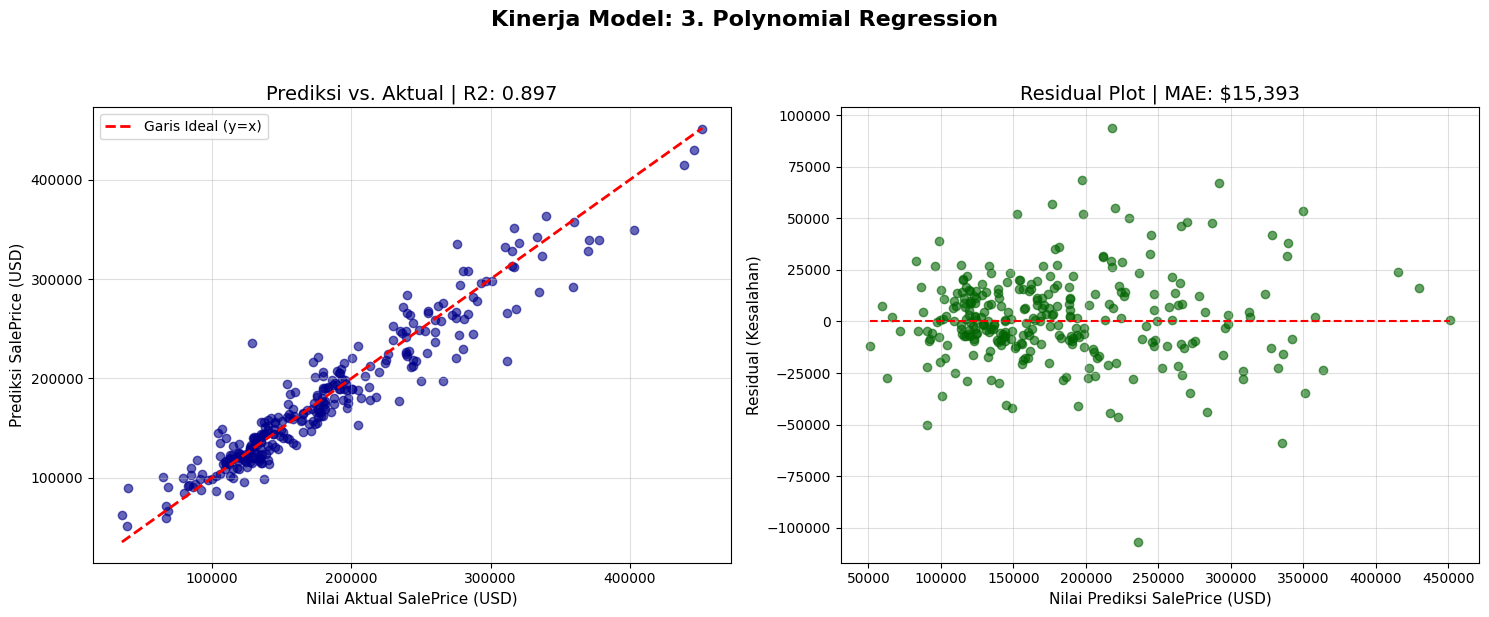

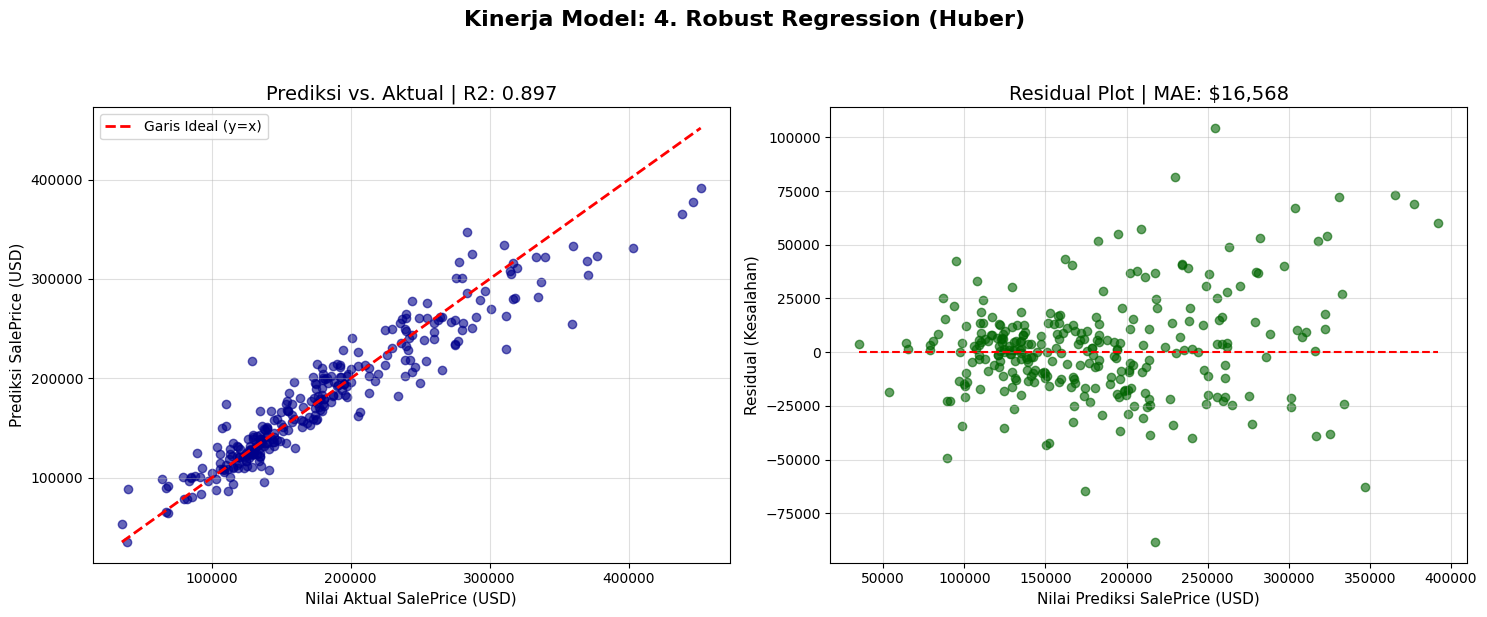

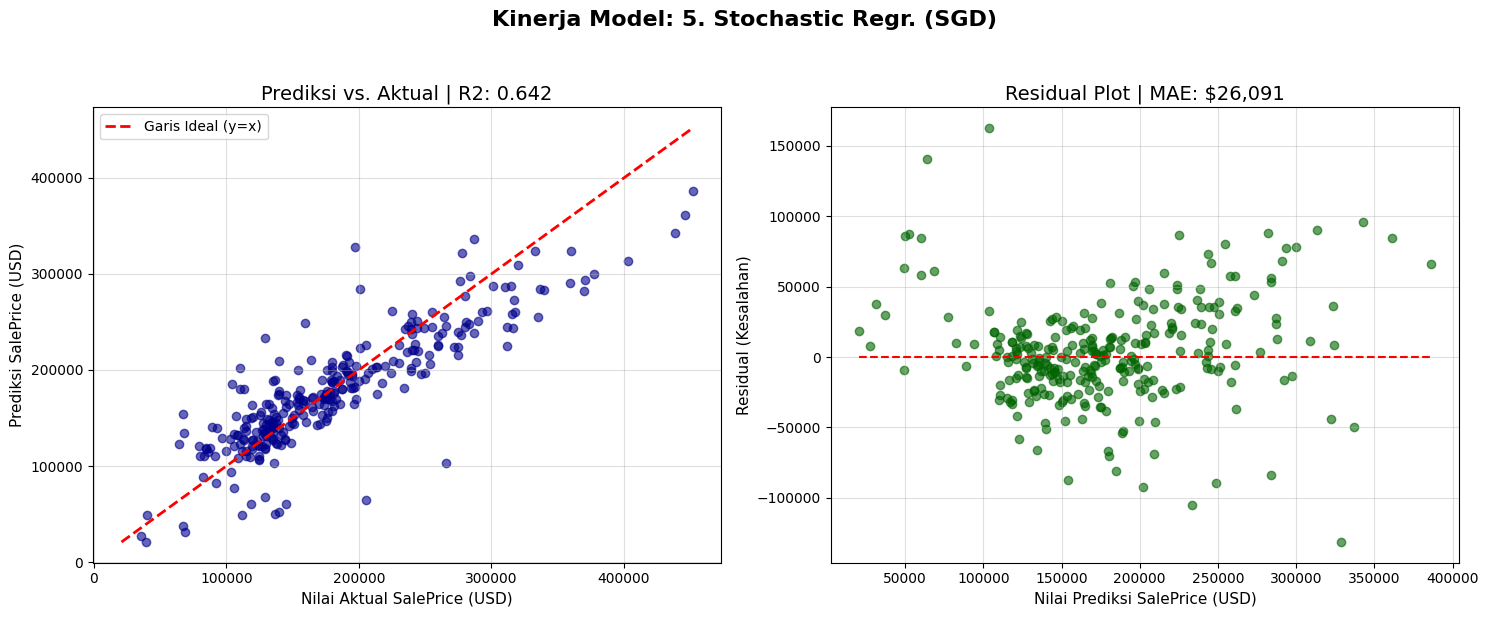

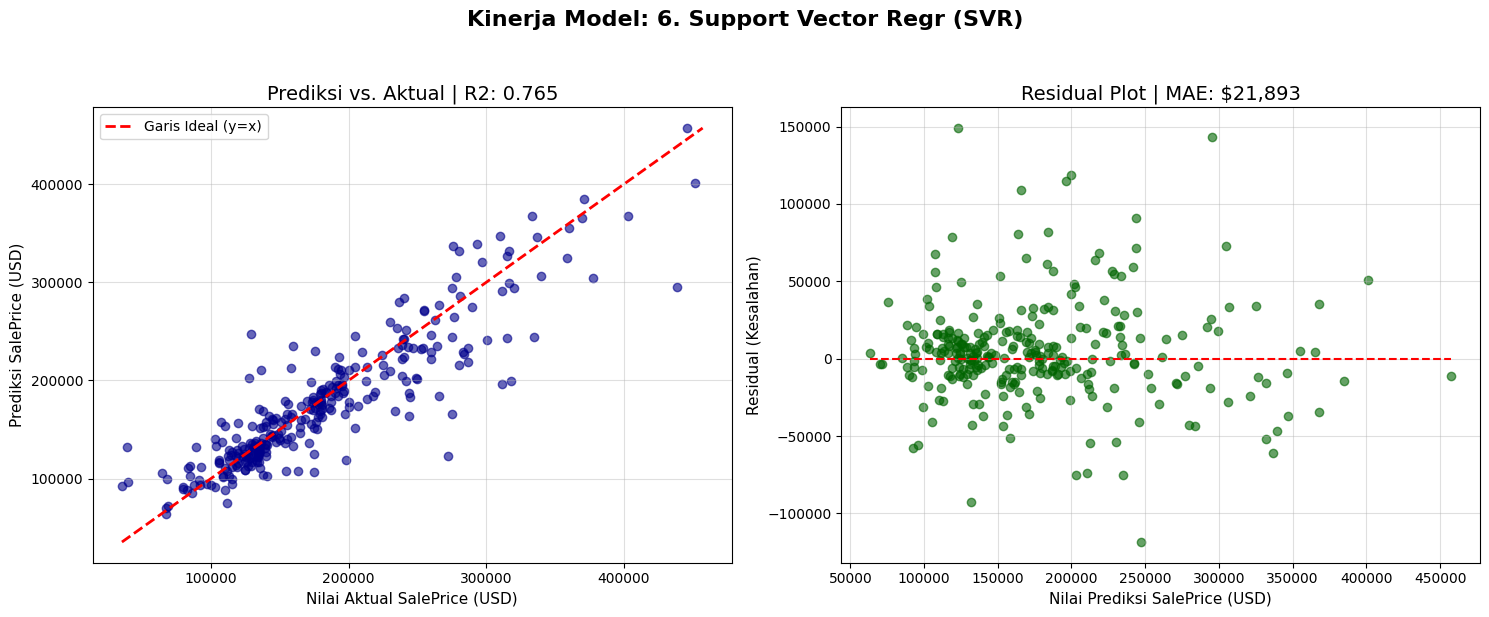

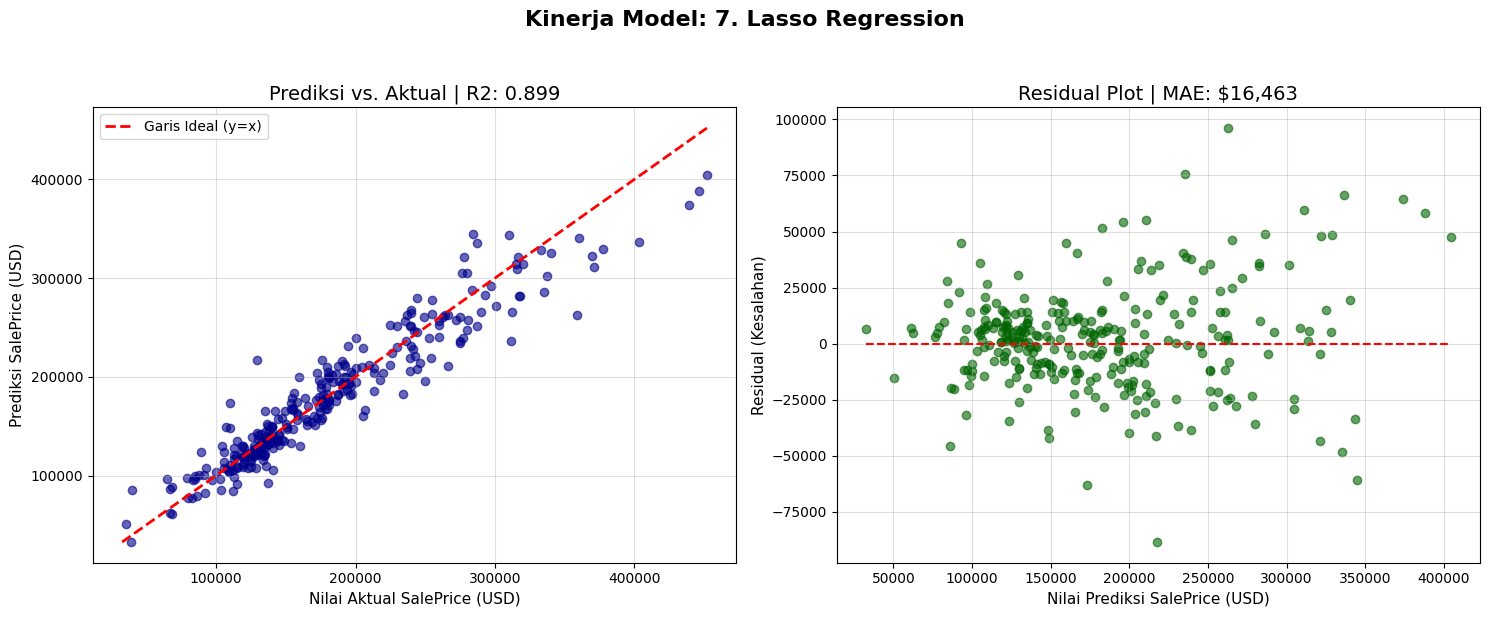

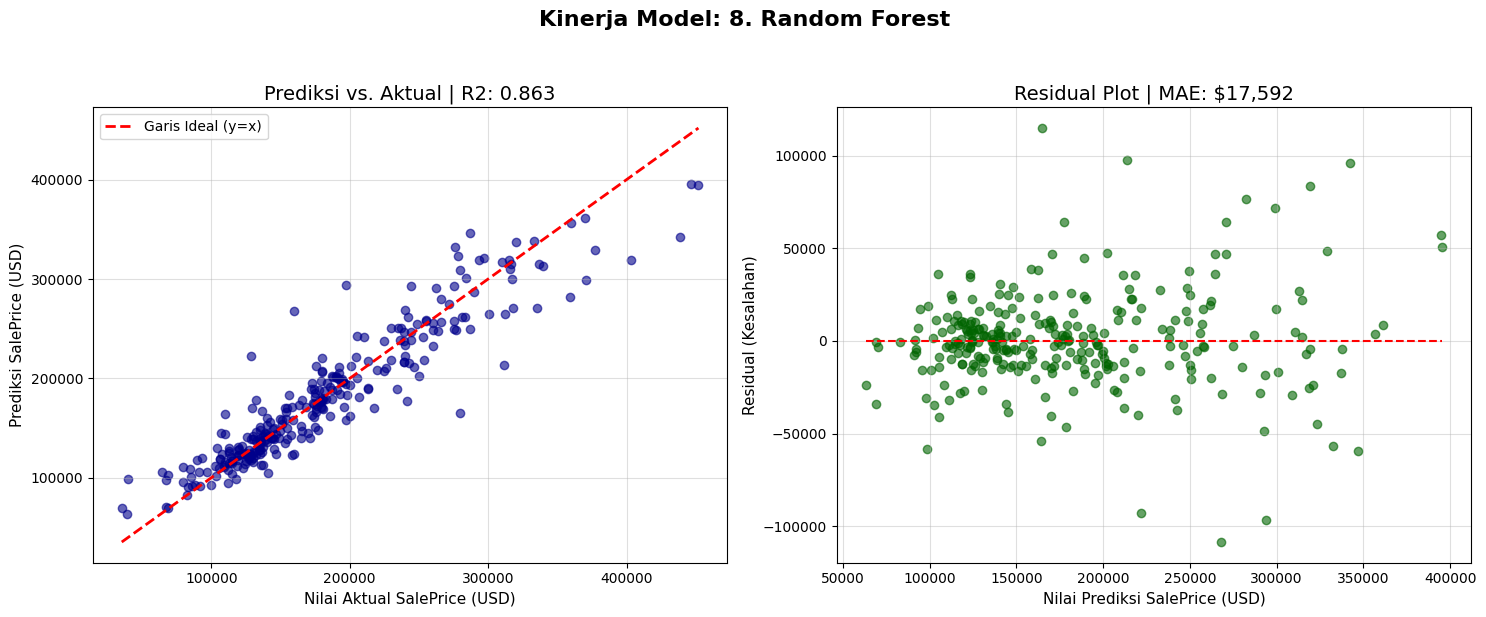


Visualisasi Kinerja 8 Model telah selesai.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# --- Pastikan X_train_selected, X_test_selected, y_train, y_test sudah didefinisikan dari langkah sebelumnya ---

# Inisialisasi 8 Model (Sama seperti sebelumnya)
models = {
    "1. Linear Regression": LinearRegression(),
    "2. Ridge Regression": Ridge(alpha=10, random_state=42),
    "3. Polynomial Regression": Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('linear', LinearRegression())
    ]),
    "4. Robust Regression (Huber)": HuberRegressor(epsilon=1.35, max_iter=1000),
    "5. Stochastic Regr. (SGD)": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "6. Support Vector Regr (SVR)": SVR(kernel='rbf', C=100, gamma=0.1),
    "7. Lasso Regression": Lasso(alpha=0.0005, random_state=42, max_iter=2000),
    "8. Random Forest": RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
}

print("--- Visualisasi Kinerja Prediksi Individual ---")

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred_log = model.predict(X_test_selected)

    y_test_original = np.expm1(y_test)
    y_pred_original = np.expm1(y_pred_log)

    residuals = y_test_original - y_pred_original

    mae = mean_absolute_error(y_test_original, y_pred_original)
    r2 = r2_score(y_test, y_pred_log)

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test_original, y_pred_original, alpha=0.6, color='darkblue')

    max_val = max(y_test_original.max(), y_pred_original.max())
    min_val = min(y_test_original.min(), y_pred_original.min())
    plt.plot([min_val, max_val], [min_val, max_val], '--r', linewidth=2, label='Garis Ideal (y=x)')

    plt.title(f'Prediksi vs. Aktual | R2: {r2:.3f}', fontsize=14)
    plt.xlabel('Nilai Aktual SalePrice (USD)', fontsize=11)
    plt.ylabel('Prediksi SalePrice (USD)', fontsize=11)
    plt.grid(alpha=0.4)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred_original, residuals, alpha=0.6, color='darkgreen')

    plt.hlines(y=0, xmin=y_pred_original.min(), xmax=y_pred_original.max(), colors='red', linestyles='--')

    plt.title(f'Residual Plot | MAE: ${mae:,.0f}', fontsize=14)
    plt.xlabel('Nilai Prediksi SalePrice (USD)', fontsize=11)
    plt.ylabel('Residual (Kesalahan)', fontsize=11)
    plt.grid(alpha=0.4)

    plt.suptitle(f'Kinerja Model: {name}', fontsize=16, y=1.02, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

print("\nVisualisasi Kinerja 8 Model telah selesai.")

# **PENJELASAN 8 TOP MODEL TERBAIK**

**1.   Linear Regression**

Linear Regression dapat mencapai $R^2$ tertinggi (0.90) dan
MAE terendah ($16.466$). Ini menunjukkan bahwa setelah dilakukan langkah Data Mapping yang ketat (Log Transform, One-Hot Encoding, dan Scaling), hubungan antara fitur dan harga jual pada dasarnya menjadi sangat linear. Artinya, 90% variabilitas harga rumah dapat dijelaskan oleh hubungan garis lurus antar fitur.Implikasi: Semua usaha Anda dalam preprocessing (terutama Log Transform dan Feature Selection) telah berhasil menghilangkan sifat non-linear data asli, membuat model yang paling sederhana menjadi yang paling efektif.

**2. Ridge Regression**

Ridge Regression memiliki kinerjanya hampir identik dengan Linear Regression.Ridge adalah Linear Regression yang ditambahkan Regularisasi L2 untuk mengatasi multikolinearitas dan overfitting.Implikasi: Kesamaan hasil ini menunjukkan bahwa multikolinearitas (korelasi tinggi antar fitur) tidak terlalu merugikan bagi kinerja prediksi Regresi Linear Anda, atau bahwa Regularisasi L2 yang diterapkan tidak banyak mengubah hasil model karena overfitting tidak terjadi secara signifikan.

**3. Polynomial Regression (Regresi Polinomial, Derajat 2)**

Model Polynomial Regression mencoba menangkap hubungan non-linear dengan secara eksplisit menciptakan fitur baru yang merupakan hasil pangkat dan interaksi (perkalian) dari fitur asli. Potensi Kinerja Jika $R^2$ score-nya lebih rendah dari Linear/Ridge, itu berarti hubungan non-linear tambahan yang diperkenalkan oleh Polynomial Features tidak relevan atau bahkan membuat model menjadi lebih rumit tanpa meningkatkan kemampuan prediksi.Jika model ini gagal mengalahkan model linear, itu memperkuat kesimpulan bahwa data Anda paling baik dimodelkan sebagai hubungan linear, dan penambahan kompleksitas Polinomial (Derajat 2) hanyalah noise.


**4. Robust Regression (Huber Regressor)**

Model regresi yang dirancang untuk tahan terhadap outlier. Tidak seperti Regresi Linear yang sensitif terhadap outlier (karena menggunakan squared error), Huber menggunakan fungsi loss yang lebih lembut pada kesalahan besar.Jika $R^2$ score dan MAE model ini mirip dengan Linear/Ridge, itu mengindikasikan bahwa langkah data cleaning dan penghapusan outlier di awal sudah sangat efektif. Karena outlier sudah dihapus, Huber tidak memiliki keuntungan besar dibandingkan model linear biasa. Kinerja yang baik dari model Robust menunjukkan bahwa, meskipun ada sedikit outlier yang tersisa, model mampu menanganinya secara stabil.

**5. Stochastic Regression (SGD Regressor)**

Model ini adalah implementasi Regresi Linear (atau Ridge/Lasso) yang dilatih menggunakan algoritma Stochastic Gradient Descent (SGD). Ini memperbarui bobot model secara bertahap menggunakan hanya satu sampel atau mini-batch data. Keunggulan utama SGD adalah kecepatan dalam melatih dataset yang sangat besar. Pada dataset kecil seperti milik Anda, akurasinya ($R^2$ Score) mungkin sedikit lebih rendah daripada Regresi Linear standar, karena proses stochastic (acak) membuatnya kurang stabil.Jika model ini berkinerja baik ($R^2$  mendekati 0.90), itu membuktikan bahwa algoritma batch-learning sederhana sudah cukup, dan jika memiliki jutaan baris data, SGD akan menjadi model pilihan terbaik

**6. Lasso Regression (Regresi Lasso)**

Lasso mirip dengan Ridge karena juga menambahkan penalti (Regularisasi) pada koefisien model, tetapi menggunakan penalti L1. Penalti L1 memiliki efek unik untuk mendorong bobot fitur yang tidak signifikan menjadi tepat nol (koefisien hilang). Jika kinerja Lasso ($R^2$ dan MAE) mirip dengan Linear/Ridge, ini menegaskan bahwa sebagian besar fitur yang dipilih sudah relevan.Jika Lasso mengungguli Linear/Ridge, ini berarti feature selection internal yang dilakukan Lasso berhasil mengeliminasi fitur noise yang masih dipertahankan oleh Linear/Ridge, sehingga membuat model lebih ringkas dan akurat.Lasso bertindak sebagai pemilih fitur (feature selector) bawaan. Ini sangat berguna untuk mendapatkan model yang
lebih sederhana dengan mengidentifikasi fitur inti yang benar-benar berpengaruh.

**7. Random Forest Regressor (Regresi Hutan Acak)**

Random Forest adalah model ensemble yang kuat,dapat membuat ratusan Decision Tree secara paralel pada subset data dan fitur yang berbeda secara acak (bagging), dan prediksi akhirnya adalah rata-rata dari semua pohon.Model ini sangat unggul pada data yang memiliki hubungan non-linear atau banyak noise.Jika $R^2$ Random Forest lebih rendah dari Linear/Ridge, ini memperkuat kesimpulan bahwa proses preprocessing (Log Transform dan Scaling) Anda berhasil membuat data sangat linear, sehingga keunggulan utama Random Forest (kemampuan non-linear) menjadi kurang signifikan. Meskipun sering menjadi model baseline non-linear terbaik, jika kalah dari model linear, itu menegaskan bahwa Regresi Linear sudah merupakan representasi yang memadai dan lebih sederhana untuk data Anda yang telah dibersihkan dengan baik.

**8. Support Vector Regression (SVR)**

SVR (menggunakan kernel seperti RBF) adalah model non-linear yang tidak mencoba meminimalkan kesalahan kuadrat, melainkan mencari hyperplane (bidang) yang memiliki margin batas ($\epsilon$) yang dapat menampung sebagian besar titik data. Ia hanya menghukum error yang jatuh di luar margin ini. Karena menggunakan kernel yang kompleks (seperti RBF), SVR mampu menangkap hubungan non-linear yang sangat rumit.Jika SVR gagal mengalahkan model linear, ini berarti kompleksitas non-linear data tidak signifikan. SVR sangat sensitif terhadap parameter (hyperparameter seperti C dan gamma) dan membutuhkan waktu komputasi yang jauh lebih lama, terutama pada dataset besar. Kinerja SVR yang baik menunjukkan adanya hubungan kompleks tersembunyi, tetapi jika kalah dari model linear, model linear lebih disukai karena lebih cepat dan mudah diinterpretasi.

**Kesimpulan Akhir Model** yang Paling bagus adalah Linear Regression (atau Ridge Regression). Dapat memberikan akurasi tertinggi ($R^2 \approx 0.90$) dan kesalahan terendah ($\text{MAE} \approx \$16.500$) karena preprocessing Anda berhasil membuat hubungan dalam data menjadi linear, sehingga model sederhana menjadi yang paling efisien dan efektif.